In [1]:
#Let's include some common libraries
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from random import randint,gauss,random
matplotlib.style.use('bmh')
%matplotlib inline

<h1 style="text-align:center">Dynamic Programming</h1>
<img style="margin-left:170px" src="https://he-s3.s3.amazonaws.com/media/uploads/6b68f98.png">

<h1 style="text-align:center">4x4 gridworld</h1>
<img style="margin-left:290px" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoUQ2-BGBKl0p5LkjvQtpXgANMgbwPgzmQ5uRNqtwLnuHgjCSX3w">

In [2]:
#Create the gridworld matrix:
gridWorld = np.zeros((4,4))
gridWorld[0][0] = 1
gridWorld[3][3] = 1
#Pandas representation of the gridworld
gridWorld_db = pd.DataFrame(gridWorld)
#Show the representation
gridWorld_db

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0


In [3]:
#State Vector:
S = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
A = np.array(['up','down','right','left'])
#Dynamics of the environment:
def map_s_to_pos(s):
    nav = 0
    for i in range(4):
        for j in range(4):
            if(nav==s):
                return i,j
            nav += 1
def prob(s_pos,a,s):
    if(s==15 or s==0):
        return 0
    i,j = map_s_to_pos(s)
    i_pos,j_pos = map_s_to_pos(s_pos)
    if(a=='up' and ((i_pos==i-1) or (i==0 and i_pos==i)) and (j_pos==j)):
        return 1
    elif(a=='down' and ((i_pos==i+1) or (i==3 and i_pos==i)) and (j_pos==j)):
        return 1
    elif(a=='right' and ((j_pos==j+1) or (j==3 and j_pos==j)) and (i_pos==i)):
        return 1
    elif(a=='left' and ((j_pos==j-1) or (j==0 and j_pos==j)) and (i_pos==i)):
        return 1
    else:
        return 0            

<h2>Iterative Policy Evaluation</h2>

In [4]:
#Probability of choosing an action given a state:
def policy_prob(s,a):
    return 0.25
#Given Reward
def reward(s,a):
    if ((s==14) and (a=='right')):
        return 1
    elif((s==11) and (a=='down')):
        return 1
    elif((s==1) and (a=='left')):
        return 1
    elif((s==4) and (a=='up')):
        return 1
    else:
        return -1

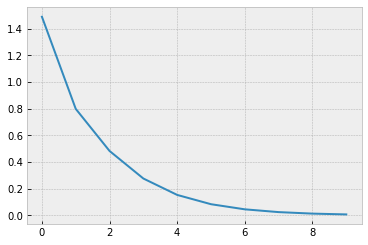

In [7]:
#Choose arbitrarily the action-values for all states, except vtarget
#Here we assigned 0 to all values:
v = np.zeros(S.shape[0])
v_ant = np.zeros(v.shape[0])
#Small positive number (accuracy of the aproximation)
theta = 0.01
#Discounted ratio between consecutive rewards
gamma = 0.7
#Error in the current aproximation
delta = 100
delta_plot=np.zeros(25)
#Number of iterations
epoch = 0
while(delta>theta):
    v_ant = np.copy(v)
    for s in S:
        crrn_result = np.zeros(A.shape[0])
        i = 0
        for a in A:
            for s_pos in S:
                if(not (s==0 or s==15)):
                    crrn_result[i] += prob(s_pos,a,s)*(reward(s,a)+gamma*v[s_pos])
            crrn_result[i] *= policy_prob(s,a)
            i +=1
        v[s] = np.sum(crrn_result)     
    delta = np.amax(np.abs(v_ant-v))
    delta_plot[epoch] = delta
    epoch += 1
plt.figure()
plt.plot(np.arange(epoch),delta_plot[0:epoch])

In [8]:
#Let's show the stimated values in the gridworld:
k = 0
valWorld = np.zeros(gridWorld.shape)
for s in S:
    i,j = map_s_to_pos(s)
    valWorld[i][j] = v[k]
    k +=1
#Pandas representation of the gridworld
gridWorld_db = pd.DataFrame(valWorld)
#Show the representation
gridWorld_db

,0,1,2,3
0,0.000000,-1.768331,-2.855326,-3.072220
1,-1.768331,-2.640792,-2.923632,-2.858920
2,-2.855326,-2.923632,-2.643210,-1.772843
3,-3.072220,-2.858920,-1.772843,0.000000


<h2>Policy Iteration</h2>

In [9]:
#Policy that maps a state to an action
policy = np.empty(S.shape[0],dtype='<U5')
#Random assignation
for i in range(policy.shape[0]):
    policy[i] = A[randint(0,A.shape[0]-1)]
policy[0] = 'non-a'
policy[15] = 'non-a'

In [10]:
#Show initial random policy
k = 0
polWorld = np.empty(gridWorld.shape,dtype='<U5')
for s in S:
    i,j = map_s_to_pos(s)
    polWorld[i][j] = policy[k]
    k +=1
policy_db = pd.DataFrame(polWorld)
policy_db

,0,1,2,3
0,non-a,right,down,up
1,right,right,left,right
2,left,left,up,down
3,left,up,down,non-a


In [ ]:
#Choose arbitrarily the action-values for all states, except vtarget
#Here we assigned 0 to all values:
v = np.zeros(S.shape[0])
v_ant = np.zeros(v.shape[0])
#Small positive number (accuracy of the aproximation)
theta = 0.01
#Discounted ratio between consecutive rewards
gamma = 0.7
#Error in the current aproximation
delta = 100
delta_plot=np.zeros(200)
#Number of iterations
epoch = 0
policy_stable = False
while(not policy_stable):
    while(delta>theta):
        v_ant = np.copy(v)
        for s in S:
            crrn_result = 0
            for s_pos in S:
                if(not (s==0 or s==15)):
                    crrn_result += prob(s_pos,policy[s],s)*(reward(s,policy[s]) + gamma*v[s_pos])
            v[s] = crrn_result 
        delta = np.amax(np.abs(v_ant - v))
        delta_plot[epoch] = delta
        epoch += 1
    delta = 100
    policy_stable = True
    for s in S:
        old_action = policy[s]
        crrn_result = np.zeros(A.shape[0])
        i = 0
        for a in A:
            for s_pos in S:
                if(not (s==0 or s==15)):
                    crrn_result[i] += prob(s_pos,a,s)*(reward(s,a) + gamma*v[s_pos])
            i +=1
        if(not (s==0 or s==15)):
            #print("--------STATE----------")
            #print(s)
            #print("------ACTION VALUES------")
            #print(crrn_result)
            policy[s] = A[np.argmax(crrn_result)]
            #print("------POLICY UPDATE------")
            #print("------" + old_action + " to " + policy[s] + "------")
        if (not old_action==policy[s]):
            policy_stable = False
    #print("-------CURRENT POST - POLICY----------")
    #print(policy)
plt.figure()
plt.plot(np.arange(epoch),delta_plot[0:epoch])

In [ ]:
#Show final policy
k = 0
polWorld = np.empty(gridWorld.shape,dtype='<U5')
for s in S:
    i,j = map_s_to_pos(s)
    polWorld[i][j] = policy[k]
    k +=1
policy_db = pd.DataFrame(polWorld)
policy_db

<h2>Value Iteration</h2>

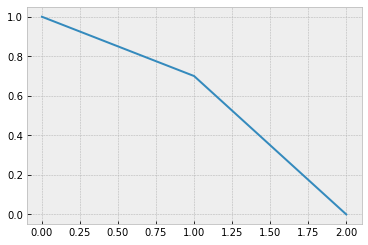

In [11]:
#Choose arbitrarily the action-values for all states, except vtarget
#Here we assigned 0 to all values:
v = np.zeros(S.shape[0])
v_ant = np.zeros(v.shape[0])
#Small positive number (accuracy of the aproximation)
theta = 0.01
#Discounted ratio between consecutive rewards
gamma = 0.7
#Error in the current aproximation
delta = 100
delta_plot=np.zeros(25)
#Number of iterations
epoch = 0
while(delta>theta):
    v_ant = np.copy(v)
    for s in S:
        crrn_result = np.zeros(A.shape[0])
        i = 0
        for a in A:
            for s_pos in S:
                if(not (s==0 or s==15)):
                    crrn_result[i] += prob(s_pos,a,s)*(reward(s,a)+gamma*v[s_pos])
            i +=1
        v[s] = np.amax(crrn_result)
        policy[s] = A[np.argmax(crrn_result)]
    delta = np.amax(np.abs(v_ant-v))
    delta_plot[epoch] = delta
    epoch += 1
plt.figure()
plt.plot(np.arange(epoch),delta_plot[0:epoch])

In [12]:
#Show final policy
k = 0
polWorld = np.empty(gridWorld.shape,dtype='<U5')
for s in S:
    i,j = map_s_to_pos(s)
    polWorld[i][j] = policy[k]
    k +=1
policy_db = pd.DataFrame(polWorld)
policy_db

,0,1,2,3
0,up,left,left,down
1,up,up,up,down
2,up,up,down,down
3,up,right,right,up
